
<font color='#b246a8' size = '6'>**`Recap`**</font>

All these courses collectively build a comprehensive skill set necessary for a data scientist:

* __Statistics__ provides the mathematical foundation for understanding data and building models.
* __Python Programming__ equips you with essential programming skills and tools for data manipulation, analysis, and visualization.
* __Data Engineering__ focuses on the infrastructure and processes needed to collect, store, and prepare data.
* __SQL and NoSQL__ cover essential database skills for data retrieval and management.
* __Big Data__ introduces technologies and frameworks to handle large-scale data processing.


## `Day 5`: Apache Spark

### Write wordCount.py

In [1]:
%%writefile wordCount.py
#!/usr/bin/env python
"""
This script reads lines from STDIN and returns a list of
all words and the count of how many times they occurred.
In programming, stdin is often used to read data in a controlled or interactive manner.
stdin allows your machine to read input from a keyboard, a file, or even another program.
INPUT:
    a text file
OUTPUT FORMAT:
    word \t count
USAGE:
    python wordCount.py < yourTextFile.txt

"""

# imports
import sys
import re
from collections import defaultdict

counts = defaultdict(int)

# stream over lines from Standard Input
for line in sys.stdin:

    # tokenize
    line = line.strip()
    words = re.findall(r'[a-z]+', line.lower())

    # count occurrences of each word
    for word in words:
        counts[word] += 1

# print word counts
for word, count in counts.items():
    print(f"{word}\t{count}")


Overwriting wordCount.py


In [2]:
%%writefile sample.txt
Hello UCI-DCE Students. Hello again, world! A red apple is tasty.
This is a simple text file.
It contains multiple lines, and words.
Hello, UCI-DCE.


Overwriting sample.txt


In [3]:
#use interactive environments to run shell commmands
#run 'python' interpreter and execute the wordCount.py script
#"<" to redicrect the content in sample.txt to the standard input of the wordCount.py script
!python wordCount.py < sample.txt


hello	3
uci	2
dce	2
students	1
again	1
world	1
an	1
red	1
apple	1
is	2
tasty	1
this	1
a	1
simple	1
text	1
file	1
it	1
contains	1
multiple	1
lines	1
and	1
words	1


In [4]:
#pip the the content into wordCount.py
!echo "Hello, Hello, Hello! UCI-DCE" | python3 wordCount.py


hello	3
uci	1
dce	1


#### Try:

*   Update the word count script by adding a feature of printing a total number
    of the unique words.
*  Run 'python' interpreter and execute the script on your defined a text file

In [5]:
%%writefile wordCount.py
#!/usr/bin/env python

# imports
import sys
import re
from collections import defaultdict

counts = defaultdict(int)

# stream over lines from Standard Input
for line in sys.stdin:

    # tokenize
    line = line.strip()
    words = re.findall(r'[a-z]+', line.lower())

    # count occurrences of each word
    for word in words:
        counts[word] += 1

# print word counts
for word, count in counts.items():
    print(f"{word}\t{count}")


# ------------------------------------------------------#
#print unique word counts
print(f'unique word counts:{len(counts)}')

Overwriting wordCount.py


In [6]:
!python3 wordCount.py < sample.txt

hello	3
uci	2
dce	2
students	1
again	1
world	1
an	1
red	1
apple	1
is	2
tasty	1
this	1
a	1
simple	1
text	1
file	1
it	1
contains	1
multiple	1
lines	1
and	1
words	1
unique word counts:22


In [7]:
#Let's extract the outputs to a text file
!python wordCount.py < sample.txt > SampleOutputs.txt

In [8]:
#check / print out the output text file
!cat SampleOutputs.txt

hello	3
uci	2
dce	2
students	1
again	1
world	1
an	1
red	1
apple	1
is	2
tasty	1
this	1
a	1
simple	1
text	1
file	1
it	1
contains	1
multiple	1
lines	1
and	1
words	1
unique word counts:22


### Part 2

### Apache Spark Execution Process
* **`Driver Program:`**

Requests resources from the cluster manager.
Forwards tasks to executors once they are provisioned.
* **`Cluster Manager:`**

Allocates resources and starts executors on worker nodes.
* **`Executors:`**

Register with the driver.
Execute the tasks assigned by the driver.
Return task results to the driver.
* **`Monitoring and Coordination:`**

The driver monitors task execution and collects results via the SparkContext.

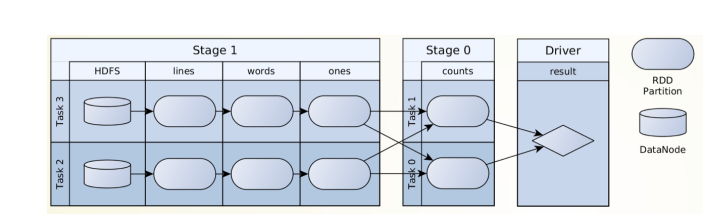

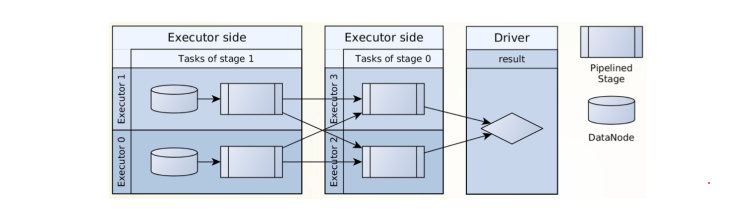

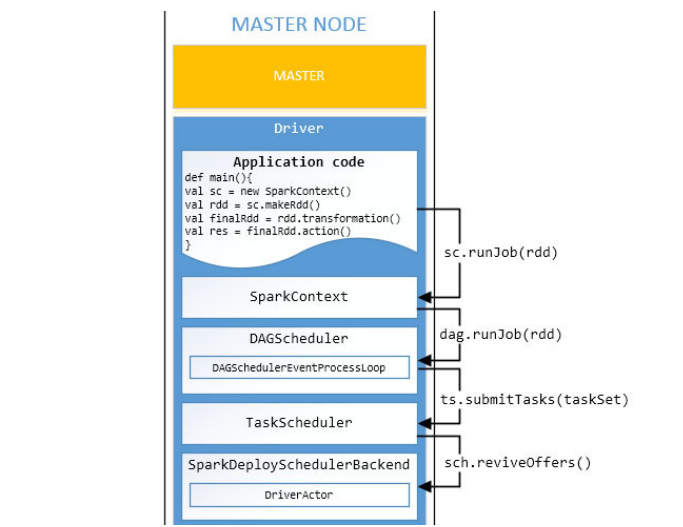

In [38]:
from IPython.display import Image, display
# Create a Display image function
def display_img(path):
    display(Image(path))

# Provide the path to your image file

image_SparkWC_DAG = '/content/drive/MyDrive/Big Data/Image/Spark Word Count Directed Acyclic Graph.png'
image_SparkExecution = '/content/drive/MyDrive/Big Data/Image/Spark WC the execution plan.png'
image_SparkAppFlowChart = '/content/drive/MyDrive/Big Data/Image/Submitting a Spark Application Flowchart.png'
imgslist = [image_SparkWC_DAG,image_SparkExecution,image_SparkAppFlowChart]
for i in imgslist:
  display_img(i)

### Underpinings of Apache Spark
Apache Spark encompasses Spark Core and four libraries:

*   Spark SQL
    * HDFS
    * Apache Hive
    * JSON
    * JDBC
    * ...
*   Spark MLlib
    * A framework for ML pipelines
    * supervised and unspervised ML alogrithms  
*   Spark GraphX
    * A network structure with the prepackaged algorithms
*   Spark Streaming
    * Decomposing batch data processing to a continuous seriesof micro-batches for real-time processing
    * Supports both batch and streaming data on the same framework




### Spark's Main Data Structure: Resilient Distributed Dataset
* A low-level object that allows Spark to process large data by spreading data across manynodes in the cluster.
* RDD can be cached in the momory of the compute nodes and reused by many interative tasks.
* The input data in an RDD is partitioned into chunks and distributed across the nodes in a Spark cluster. Each node performs computations  in parallel on its own chunk.
* <font color = "#c04e01">**`Transformations`**</font>: for new RDDs construction and don't show the outputs.
* <font color = "#c04e01">**`Actions`**</font> :trigger

### Key Advantackes of Spark over Hadoop


*   Efficiency: computation occurs in memory
*   Avaiablility of various Spark APIs
    * Core or RDD
    * Spark SQL
    * Spark MLlib
    * ...

References
<font size = "1.5">
  - Bonner, S., Kureshi, I., Brennan, J., & Theodoropoulos, G. (2017). Chapter 14
  Exploring the Evolution of Big Data Technologies. Software Architecture for Big Data and the Cloud.
  - Pointer, I. (2020). What is Apache Spark?: The Big Data Platform that Crushed Hadoop.
  - Vaidya, N. (2020). Apache Spark Architecture - Spark Cluster Architecture Explained.
</font>


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import os

# Install Java if not already installed
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Define the URL and file name for Hadoop
hadoop_url = "https://downloads.apache.org/hadoop/common/hadoop-3.4.0/hadoop-3.4.0.tar.gz"
hadoop_file = "hadoop-3.4.0.tar.gz"

# Check if the Hadoop tar.gz file already exists
if not os.path.exists(hadoop_file):
    # Download the Hadoop tar.gz file if it doesn't exist
    !wget -q $hadoop_url
else:
    print("Hadoop tar.gz file already exists. Skipping download.")

# Extract the Hadoop tar.gz file
!tar -xzf $hadoop_file

In [40]:
# Set the path to your Hadoop installation
hadoop_path = '/content/hadoop-3.4.0'

# Set environment variables
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64'
os.environ['HADOOP_HOME'] = hadoop_path
os.environ['PATH'] = os.environ['PATH'] + f':{hadoop_path}/bin:{hadoop_path}/sbin'

In [41]:
# install findspark using pip
!pip3 install -q findspark

In [14]:
!pip3 install pyspark==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=349f0ce0bd54c3e7face97acb447ebb4000d559f88b6d4f2717fdf09ba0ec264
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [42]:
import findspark
findspark.init()

In [43]:
# to shutdown Spark. (RUN THIS CELL AS IS)
# if Spark is not running no problem
# if Spark is running no problem also it will be shutdown
#

try:
    spark
    print(f"{sc.master} appName: {sc.appName}")
    spark.sparkContext.stop()
    del spark; del sc
    print(f"Just Shutdown Spark.")
except NameError:
    print("Spark is NOT currently running")

local[*] appName: Day5_Spark_Notebook
Just Shutdown Spark.


In [44]:
# start Spark Session (RUN THIS CELL AS IS)
#Step A: Start Spark by running the following cell

from pyspark.sql import SparkSession

try:
    spark
    print("Spark is already running")
    print(f"{sc.master} appName: {sc.appName}")
except NameError:
    print('starting Spark')
    app_name = 'Day5_Spark_Notebook'
    master = "local[*]"
    spark = SparkSession\
            .builder\
            .appName(app_name)\
            .master(master)\
            .getOrCreate()
sc = spark.sparkContext


starting Spark


#### Exercise 1: about RDD

In [45]:
#squared each element in a RDD using map()
data = [1, 2, 3, 4, 5]
rdd = sc.parallelize(data)
rdd_squared = rdd.map(lambda x: x*x)
print("Squared RDD:", rdd_squared.collect())


Squared RDD: [1, 4, 9, 16, 25]


In [19]:
#Take the first element from the list
first_element = rdd.first()

# Get the last element
last_element =  rdd.collect()[-1]

print(f"First element: {first_element}")
print(f"Last element: {last_element}")



First element: 1
Last element: 5


In [20]:
## Filter the RDD
even_rdd = rdd.filter(lambda x: x%2 ==0)
print(even_rdd.collect())

[2, 4]


In [21]:
## Reduce the RDD
# Reduce the RDD
sum_rdd = rdd.reduce(lambda x, y: x + y)
print("Sum of RDD:", sum_rdd)

Sum of RDD: 15


In [22]:
## Word Count Again
# Read the text file into an RDD
text_rdd = sc.textFile("sample.txt")

# Split the text into words
words_rdd = text_rdd.flatMap(lambda line: line.split())

# Count the occurrences of each word
word_counts = words_rdd.map(lambda word: (word, 1)).reduceByKey(lambda a, b: a + b)

# Sort the word counts by frequency
sorted_word_counts = word_counts.sortBy(lambda x: x[1], ascending=False)

# Print the top 10 most frequent words
for word, count in sorted_word_counts.take(10):
    print(f"{word}: {count}")

Hello: 2
is: 2
UCI-DCE: 1
again,: 1
world!: 1
simple: 1
file.: 1
It: 1
multiple: 1
Hello,: 1


#### Exercise 2: Transofrmations and Actions

In [23]:
# Create an RDD
numbers_rdd = sc.parallelize([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Transformations
doubled_rdd = numbers_rdd.map(lambda x: x * 2)
filtered_rdd = numbers_rdd.filter(lambda x: x % 2 == 0)
combined_rdd = doubled_rdd.union(filtered_rdd)

# Actions
count = combined_rdd.count()
print("Count:", count)

sum_value = combined_rdd.reduce(lambda x, y: x + y)
print("Sum:", sum_value)

top_three = combined_rdd.takeOrdered(3, key=lambda x: -x)
print("Top two elements:", top_three)

Count: 15
Sum: 140
Top two elements: [20, 18, 16]


#### Caching and Persistence

In [24]:
# Create an RDD
numbers_rdd = sc.parallelize([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Cache the RDD
numbers_rdd.cache()

# Perform some operations
rddX3 = numbers_rdd.map(lambda x: x *3)
print("RDD X3:", rddX3.collect())

# Uncache the RDD or remove the cached data related to the numbers_rdd from memory.
numbers_rdd.unpersist()

RDD X3: [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]


ParallelCollectionRDD[26] at readRDDFromFile at PythonRDD.scala:289

#### [RDD Practice](https://github.com/UCI-DCE/Data-Engineering/tree/Big-Data)

* news.txt
#read the news articale from text

Democrats grapple with the right way to talk about Biden immigration policies|Politics,Law|2024-05-26|4.5
Ozempic reduces risk of serious illness and death in people with diabetes and kidney disease|Health, Science|2024-05-24|4.8
Tech Giant Announces Massive Layoffs|Business,Technology|2023-05-15|4.2
Climate Change Summit Concludes with Historic Agreement|Environment,Politics|2023-05-20|4.6
Controversial Bill Passes in State Legislature|Politics,Law|2023-05-22|3.9
New Advances in Renewable Energy Technology|Science,Technology|2023-05-24|4.3
Protests Erupt Nationwide Over Income Inequality|Society,Politics|2023-05-25|4.1
An imbalance of two health fats affects your early death risk|Health,Science|2024-05-14|4.7


#### Tasks:

1. Load the dataset into an RDD:
   * Create an RDD from the news.txt file.
   * Split each line of the RDD into individual fields (title, category, release year, and rating).
2. Filter the RDD:
   * Create a new RDD that contains only the news released after the year 2023.
   * Create a new RDD that contains only the news with a rating greater than 4.5.
3. Transform the RDD:
   * Create a new RDD that contains the news title and the release year.
   * Create a new RDD that contains the news title and the rating for each title.
4. Perform Actions on the RDD:
   * Find the news with the highest rating.
   * Find the average rating of all the news.
   * Find the number of unique news categories or tags in the dataset.

In [47]:
### YOUR CODE HERE##
#read the news articale from text
%%writefile news.txt
Democrats grapple with the right way to talk about Biden immigration policies|Politics,Law|2024-05-26|4.5
Ozempic reduces risk of serious illness and death in people with diabetes and kidney disease|Health, Science|2024-05-24|4.8
Tech Giant Announces Massive Layoffs|Business,Technology|2023-05-15|4.2
Climate Change Summit Concludes with Historic Agreement|Environment,Politics|2023-05-20|4.6
Controversial Bill Passes in State Legislature|Politics,Law|2023-05-22|3.9
New Advances in Renewable Energy Technology|Science,Technology|2023-05-24|4.3
Protests Erupt Nationwide Over Income Inequality|Society,Politics|2023-05-25|4.1
An imbalance of two health fats affects your early death risk|Health,Science|2024-05-14|4.7


Overwriting news.txt


In [26]:
!cat news.txt

Democrats grapple with the right way to talk about Biden immigration policies|Politics,Law|2024-05-26|4.5
Ozempic reduces risk of serious illness and death in people with diabetes and kidney disease|Health, Science|2024-05-24|4.8
Tech Giant Announces Massive Layoffs|Business,Technology|2023-05-15|4.2
Climate Change Summit Concludes with Historic Agreement|Environment,Politics|2023-05-20|4.6
Controversial Bill Passes in State Legislature|Politics,Law|2023-05-22|3.9
New Advances in Renewable Energy Technology|Science,Technology|2023-05-24|4.3
Protests Erupt Nationwide Over Income Inequality|Society,Politics|2023-05-25|4.1
An imbalance of two health fats affects your early death risk|Health,Science|2024-05-14|4.7


In [48]:
##Filters
# generate a rdd object
news_rdd = sc.textFile("news.txt")
print(news_rdd.collect())
# Filter articles published after a certain date
recent_articles = news_rdd.filter(lambda x: x.split('|')[2] >= '2024-01-01')
output = recent_articles.collect()
print(" ")

for article in output:
    print(article)


['Democrats grapple with the right way to talk about Biden immigration policies|Politics,Law|2024-05-26|4.5', 'Ozempic reduces risk of serious illness and death in people with diabetes and kidney disease|Health, Science|2024-05-24|4.8', 'Tech Giant Announces Massive Layoffs|Business,Technology|2023-05-15|4.2', 'Climate Change Summit Concludes with Historic Agreement|Environment,Politics|2023-05-20|4.6', 'Controversial Bill Passes in State Legislature|Politics,Law|2023-05-22|3.9', 'New Advances in Renewable Energy Technology|Science,Technology|2023-05-24|4.3', 'Protests Erupt Nationwide Over Income Inequality|Society,Politics|2023-05-25|4.1', 'An imbalance of two health fats affects your early death risk|Health,Science|2024-05-14|4.7']
 
Democrats grapple with the right way to talk about Biden immigration policies|Politics,Law|2024-05-26|4.5
Ozempic reduces risk of serious illness and death in people with diabetes and kidney disease|Health, Science|2024-05-24|4.8
An imbalance of two hea

In [49]:
### filter rating
#note that datatype convertion here

# Filter high-rated articles
high_rated_articles = news_rdd.filter(lambda x: float(x.split('|')[3]) > 4.5)

# Print the high-rated articles
print("High-rated articles:")
for article in high_rated_articles.collect():
    print(article)

High-rated articles:
Ozempic reduces risk of serious illness and death in people with diabetes and kidney disease|Health, Science|2024-05-24|4.8
Climate Change Summit Concludes with Historic Agreement|Environment,Politics|2023-05-20|4.6
An imbalance of two health fats affects your early death risk|Health,Science|2024-05-14|4.7


In [50]:
##count each articles by tags

tag_counts = news_rdd.flatMap(lambda x: x.split('|')[1].split(',')) \
                     .map(lambda tag: (tag, 1)) \
                     .reduceByKey(lambda a, b: a + b) \
                     .sortBy(lambda x: x[1], ascending=False)
tag_counts.collect()

[('Politics', 4),
 ('Law', 2),
 ('Science', 2),
 ('Health', 2),
 ('Technology', 2),
 ('Society', 1),
 (' Science', 1),
 ('Business', 1),
 ('Environment', 1)]

In [51]:
## find the article with the highest rating

top_article = news_rdd.map(lambda x: (float(x.split('|')[3]), x)).max()[1]
top_article

'Ozempic reduces risk of serious illness and death in people with diabetes and kidney disease|Health, Science|2024-05-24|4.8'

In [52]:
## calculate the average rating with a specific tag

topic_tag = 'Health'
topic_articles = news_rdd.filter(lambda x: topic_tag in x.split('|')[1]) \
                         .map(lambda x: float(x.split('|')[3]))
topic_avg_rating = topic_articles.mean()
topic_avg_rating

4.75

In [53]:
## Optional
##group articles by date and count the number of articles per day
article_counts_by_date = news_rdd.map(lambda x: (x.split('|')[2], 1)) \
                                .reduceByKey(lambda a, b: a + b) \
                                .sortByKey()
for one in article_counts_by_date.collect():
  print(one)
  print(" ")

('2023-05-15', 1)
 
('2023-05-20', 1)
 
('2023-05-22', 1)
 
('2023-05-24', 1)
 
('2023-05-25', 1)
 
('2024-05-14', 1)
 
('2024-05-24', 1)
 
('2024-05-26', 1)
 


##<font color= "#3abc95">**`What did you learn today?`**</font>





##Optional
*  `What is the difference between groupBy() and reduceByKey()?`

In [33]:
#Considering the followings:

rdd1= sc.parallelize([('a', 1), ('b', 2), ('a', 3)])
# Group the RDD by key using groupBy
groupedRDD = rdd1.groupBy(lambda y: y[0])
result_count = groupedRDD.mapValues(lambda values: len(values)).collect()


In [34]:
result_count

[('b', 1), ('a', 2)]

In [35]:
# Sum the values for each key using mapValues
result_sum = groupedRDD.mapValues(lambda values: sum(value[1] for value in values)).collect()
result_sum


[('b', 2), ('a', 4)]

In [36]:
# reduceByKey

reduced_rdd = rdd1.reduceByKey(lambda a, b: a + b)
reduced_rdd.collect()
# Resulting RDD: [('a', 4), ('b', 2)]


[('b', 2), ('a', 4)]

In [37]:
def reduceByKey(rdd, reduce_func):
    # Initialize an empty dictionary to store intermediate results
    reduced_dict = {}

    # Iterate through each key-value pair in the RDD
    for key, value in rdd:
        # Check if the key already exists in the dictionary
        if key in reduced_dict:
            # If the key exists, apply the reduce function to the current value and the existing value in the dictionary
            reduced_dict[key] = reduce_func(reduced_dict[key], value)
        else:
            # If the key doesn't exist, add it to the dictionary with the current value
            reduced_dict[key] = value

    # Convert the reduced dictionary to a list of key-value tuples and return as an RDD
    return list(reduced_dict.items())


# Example usage:
input_rdd = [('a', 1), ('b', 2), ('a', 3), ('b', 4), ('a', 5)]

# Define a reduce function (in this case, it sums two values)
def sum_values(a, b):
    return a + b

# Apply reduceByKey with the sum_values function
output_rdd = reduceByKey(input_rdd, sum_values)

print(output_rdd)


[('a', 9), ('b', 6)]
